In [97]:
#####Set librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate

In [98]:
#####import data including only Aver_delta, R(grain size), and cluster_label
delta_size_cluster_all = pd.read_csv('delta_size_cluster_all.csv')
delta_size_cluster_all.head()

,Aver_delta,R,clust_label
0,1.772541,2200.0,1
1,-0.274095,26.3,0
2,1.084926,1150.0,1
3,-0.698569,15.0,0
4,-0.341247,31.0,0


In [99]:
#####data split
X_features = delta_size_cluster_all.iloc[:, :-1]
y_labels = delta_size_cluster_all.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size = 0.1, stratify = y_labels)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('train shape:', train_cnt)
print('test shape:', test_cnt)

print('ratio for each label value in training set')
print(y_train.value_counts()/train_cnt)
print('ratio for each label value in testing set')
print(y_test.value_counts()/test_cnt)

train shape: 75
test shape: 9
ratio for each label value in training set
0    0.626667
1    0.373333
Name: clust_label, dtype: float64
ratio for each label value in testing set
0    0.666667
1    0.333333
Name: clust_label, dtype: float64


In [100]:
#####Training data
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print('accuracy:{0:.3f}'.format(accuracy_score(y_test, lr_pred)))
print('roc_auc:{0:.3f}'.format(roc_auc_score(y_test, lr_pred)))

accuracy:1.000
roc_auc:1.000


In [101]:
#####Confirm predict values for X_test data
lr_predict = lr_clf.predict_proba(X_test)
lr_predict

array([[0.98300859, 0.01699141],
       [0.49297435, 0.50702565],
       [0.93767503, 0.06232497],
       [0.17434477, 0.82565523],
       [0.16069268, 0.83930732],
       [0.96060447, 0.03939553],
       [0.85233886, 0.14766114],
       [0.96538796, 0.03461204],
       [0.94163407, 0.05836593]])

In [102]:
#####Trained model validation (cross validation)
scores = cross_val_score(lr_clf, X_features, y_labels, scoring = 'accuracy', cv = 10)

print('Cross validation accuracy:', np.round(scores, 4))
print('Average accuracy:', np.round(np.mean(scores),4))
recall_scores = cross_val_score(lr_clf, X_features, y_labels, scoring = 'recall', cv = 10)
print('Cross validation recall:', np.round(recall_scores, 4))
print('Average recall:', np.round(np.mean(recall_scores),4))
precision_scores = cross_val_score(lr_clf, X_features, y_labels, scoring = 'precision', cv = 10)
print('Cross validation precision:', np.round(precision_scores, 4))
print('Average precision:', np.round(np.mean(precision_scores),4))
precision_scores = cross_val_score(lr_clf, X_features, y_labels, scoring = 'f1', cv = 10)
print('Cross validation f1:', np.round(precision_scores, 4))
print('Average f1:', np.round(np.mean(precision_scores),4))
roc_auc_scores = cross_val_score(lr_clf, X_features, y_labels, scoring = 'roc_auc', cv = 10)
print('Cross validation roc_auc:', np.round(roc_auc_scores, 4))
print('Average roc_auc:', np.round(np.mean(roc_auc_scores),4))

Cross validation accuracy: [1.    1.    1.    1.    0.75  1.    0.875 1.    0.875 1.   ]
Average accuracy: 0.95
Cross validation recall: [1.     1.     1.     1.     0.3333 1.     0.6667 1.     1.     1.    ]
Average recall: 0.9
Cross validation precision: [1.   1.   1.   1.   1.   1.   1.   1.   0.75 1.  ]
Average precision: 0.975
Cross validation f1: [1.     1.     1.     1.     0.5    1.     0.8    1.     0.8571 1.    ]
Average f1: 0.9157
Cross validation roc_auc: [1.     1.     1.     1.     0.9333 1.     1.     1.     0.9333 1.    ]
Average roc_auc: 0.9867


In [103]:
#####Import frame data set for probability map
Data = pd.read_csv('delta_size50x50.csv')
Data.head()

,Aver_delta,R
0,2.400000,10.0
1,2.326531,10.0
2,2.253061,10.0
3,2.179592,10.0
4,2.106122,10.0


In [104]:
#####Predict the frame data set
X_features_delta_size50x50 = Data[['Aver_delta','R']].values
lr_pred = lr_clf.predict(X_features_delta_size50x50)
lr_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [105]:
#####Confrim predict_proba values of the predicted frame data set
probability = lr_clf.predict_proba(X_features_delta_size50x50)
Data['probability'] = probability[:, 1]
Data.head()

,Aver_delta,R,probability
0,2.400000,10.0,0.997744
1,2.326531,10.0,0.997180
2,2.253061,10.0,0.996476
3,2.179592,10.0,0.995598
4,2.106122,10.0,0.994501


In [106]:
#####Construct DataFrame for the predicted frame data set
plt.rcParams['figure.figsize'] = [10, 8]

df = Data.pivot('Aver_delta', 'R', 'probability')
df=df.sort_values(by='Aver_delta', ascending=False)
df.head(10)

R,10.000000,52.653061,95.306122,137.959184,180.612245,223.265306,265.918367,308.571429,351.224490,393.877551,...,1716.122449,1758.775510,1801.428571,1844.081633,1886.734694,1929.387755,1972.040816,2014.693878,2057.346939,2100.000000
Aver_delta,,,,,,,,,,,,,,,,,,,,,
2.400000,0.997744,0.997903,0.998050,0.998188,0.998315,0.998434,0.998544,0.998647,0.998742,0.998831,...,0.999879,0.999887,0.999895,0.999903,0.999910,0.999916,0.999922,0.999927,0.999932,0.999937
2.326531,0.997180,0.997379,0.997563,0.997735,0.997894,0.998042,0.998180,0.998308,0.998427,0.998538,...,0.999848,0.999859,0.999869,0.999878,0.999887,0.999895,0.999902,0.999909,0.999916,0.999922
2.253061,0.996476,0.996724,0.996954,0.997169,0.997368,0.997553,0.997725,0.997885,0.998034,0.998173,...,0.999810,0.999824,0.999836,0.999848,0.999859,0.999869,0.999878,0.999886,0.999894,0.999902
2.179592,0.995598,0.995907,0.996194,0.996462,0.996711,0.996942,0.997157,0.997357,0.997543,0.997716,...,0.999763,0.999780,0.999795,0.999810,0.999823,0.999836,0.999847,0.999858,0.999868,0.999877
2.106122,0.994501,0.994887,0.995246,0.995579,0.995890,0.996179,0.996447,0.996697,0.996929,0.997145,...,0.999704,0.999725,0.999744,0.999762,0.999779,0.999794,0.999809,0.999822,0.999835,0.999847
2.032653,0.993132,0.993614,0.994062,0.994478,0.994866,0.995226,0.995561,0.995873,0.996163,0.996433,...,0.999629,0.999656,0.999680,0.999702,0.999723,0.999743,0.999761,0.999778,0.999794,0.999808
1.959184,0.991427,0.992027,0.992585,0.993104,0.993588,0.994037,0.994456,0.994845,0.995207,0.995543,...,0.999537,0.999569,0.999600,0.999628,0.999654,0.999679,0.999701,0.999722,0.999742,0.999760
1.885714,0.989302,0.990049,0.990744,0.991392,0.991994,0.992555,0.993076,0.993561,0.994013,0.994433,...,0.999421,0.999461,0.999499,0.999535,0.999568,0.999598,0.999626,0.999653,0.999677,0.999700
1.812245,0.986657,0.987587,0.988452,0.989258,0.990008,0.990707,0.991357,0.991961,0.992524,0.993048,...,0.999276,0.999327,0.999374,0.999418,0.999459,0.999497,0.999533,0.999566,0.999596,0.999625


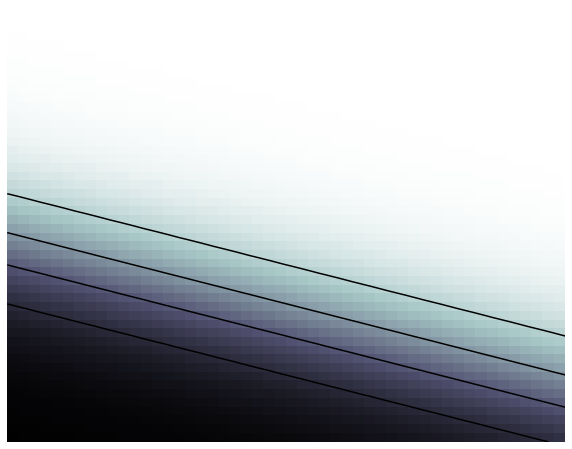

In [107]:
# Visualizing the predicted frame data set
fig, ax = plt.subplots()
smooth_scale = 1
z = ndimage.zoom(df.to_numpy(), smooth_scale)
cntr = ax.contour(np.linspace(0, len(df.columns), len(df.columns) * smooth_scale),
                  np.linspace(0, len(df.index), len(df.index) * smooth_scale),
                  z, levels=(0.2, 0.4, 0.6, 0.8), colors='black')
ax = sns.heatmap(df, cbar=False, ax=ax, cmap='bone', vmin=0, vmax=1)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
figure = ax.get_figure()
#figure.savefig('delta_size_probability_map_all.pdf', dpi=600)

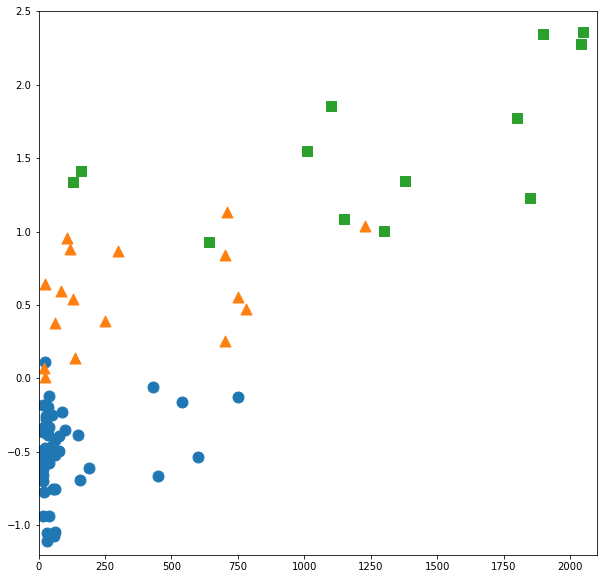

In [108]:
#####Visualizing spinel data set
delta_size_cluster_all_three = pd.read_csv('delta_size_cluster_all_three.csv')
marker0_ind = delta_size_cluster_all_three[delta_size_cluster_all_three['clust_label'] == 0].index
marker1_ind = delta_size_cluster_all_three[delta_size_cluster_all_three['clust_label'] == 1].index
marker2_ind = delta_size_cluster_all_three[delta_size_cluster_all_three['clust_label'] == 2].index

plt.rcParams["figure.figsize"] = (10, 10)
plt.scatter(x = delta_size_cluster_all_three.loc[marker0_ind, 'R'], y = delta_size_cluster_all_three.loc[marker0_ind, 'Aver_delta'], 
            marker = 'o', s=120)
plt.scatter(x = delta_size_cluster_all_three.loc[marker1_ind, 'R'], y = delta_size_cluster_all_three.loc[marker1_ind, 'Aver_delta'], 
            marker = '^', s=120)
plt.scatter(x = delta_size_cluster_all_three.loc[marker2_ind, 'R'], y = delta_size_cluster_all_three.loc[marker2_ind, 'Aver_delta'], 
            marker = 's', s=120)

plt.xlim([0, 2100])
plt.ylim([-1.2, 2.5])
#plt.savefig('delta_size_scatter.pdf', dpi=600)
plt.show()